In [16]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.models import Sequential
import datetime
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#載入CSV
train = pd.read_csv('train-v3.csv')
valid = pd.read_csv('valid-v3.csv')
test = pd.read_csv('test-v3.csv')

In [2]:
#查看相關性
train.corr()

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018552,0.011739,-0.015319,-0.000028,-0.001835,0.003585,-0.017667,-0.142302,0.021799,...,0.007314,-0.014489,-0.009677,0.023552,-0.015689,-0.009795,-0.003877,0.016109,-0.008666,-0.142482
price,-0.018552,1.000000,0.007752,-0.024029,-0.008888,0.301817,0.521330,0.702100,0.101519,0.241054,...,0.672523,0.601167,0.337082,0.057491,0.129219,-0.052930,0.309688,0.020066,0.586408,0.078428
sale_yr,0.011739,0.007752,1.000000,-0.781698,0.000353,0.001494,-0.015368,-0.021402,0.006448,-0.018299,...,-0.024184,-0.021474,-0.004370,-0.001010,-0.013095,0.008871,-0.026338,-0.002823,-0.017867,0.002483
sale_month,-0.015319,-0.024029,-0.781698,1.000000,-0.066544,-0.010604,-0.007158,-0.000472,-0.007040,0.010150,...,-0.004369,0.002046,-0.004823,-0.008522,0.004638,-0.003360,0.007777,-0.007013,-0.005913,-0.002281
sale_day,-0.000028,-0.008888,0.000353,-0.066544,1.000000,-0.002956,-0.000282,-0.004819,-0.015035,-0.002563,...,-0.004275,0.000539,-0.011064,-0.003967,0.015097,-0.011836,-0.003930,-0.005230,-0.000844,-0.009109
bedrooms,-0.001835,0.301817,0.001494,-0.010604,-0.002956,1.000000,0.506150,0.563715,0.043723,0.158787,...,0.357437,0.471012,0.292518,0.158293,0.017019,-0.153187,-0.011471,0.134836,0.383713,0.035662
bathrooms,0.003585,0.521330,-0.015368,-0.007158,-0.000282,0.506150,1.000000,0.751196,0.111547,0.525690,...,0.670199,0.683281,0.285493,0.517302,0.051187,-0.210371,0.023491,0.229700,0.571972,0.098087
sqft_living,-0.017667,0.702100,-0.021402,-0.000472,-0.004819,0.563715,0.751196,1.000000,0.199900,0.356204,...,0.764135,0.877851,0.439577,0.321174,0.056815,-0.198690,0.057183,0.241130,0.757771,0.192312
sqft_lot,-0.142302,0.101519,0.006448,-0.007040,-0.015035,0.043723,0.111547,0.199900,1.000000,-0.001955,...,0.134900,0.209318,0.024416,0.061289,0.015304,-0.134486,-0.098030,0.243222,0.160086,0.719971
floors,0.021799,0.241054,-0.018299,0.010150,-0.002563,0.158787,0.525690,0.356204,-0.001955,1.000000,...,0.471167,0.517587,-0.227682,0.583424,-0.013754,-0.101169,0.036589,0.161123,0.297821,-0.010979


<AxesSubplot:>

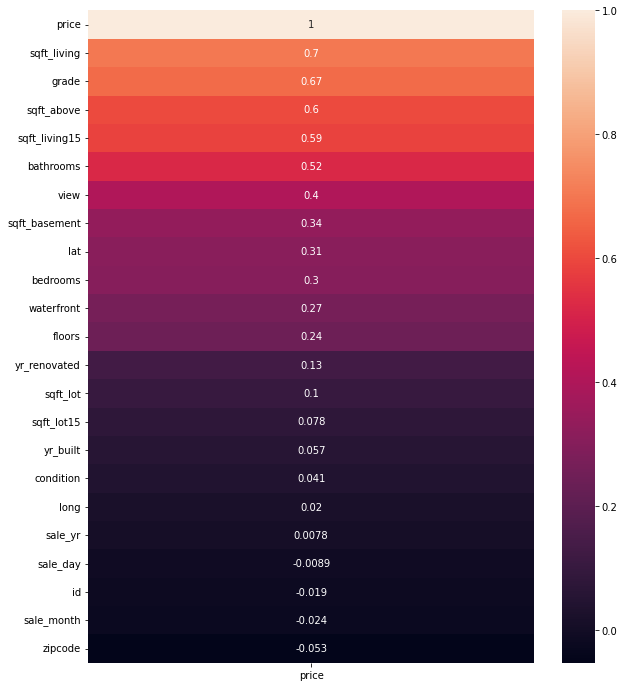

In [19]:
fig,ax = plt.subplots(figsize=(10,12))
price_corr = train.corr()[["price"]].sort_values(by='price',ascending=False)
sns.heatmap(price_corr,annot=True,ax=ax)

In [20]:
#選取欄位
title=['bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot','waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
      'lat', 'long', 'sqft_living15',
       'sqft_lot15']
Size=len(title)
data=train[title]
data_valid=valid[title]
data_test=test[title]
y_train = train["price"]
y_valid = valid["price"] 

In [21]:
#標準化
scaler=StandardScaler().fit(data)
x_train = preprocessing.scale(data)
x_valid = scaler.transform(data_valid)
x_test = scaler.transform(data_test)

In [30]:
#練模型
from tensorflow.keras.layers import Dense , Dropout
import tensorflow as tf
model = Sequential() 
sess = tf.compat.v1.Session()
model.add(Dense(units=80,activation="relu", input_shape=(Size,)))
model.add(Dense(units =100, activation="relu"))
model.add(Dense(units =400, activation="relu"))
model.add(Dense(units =100, activation="relu"))
model.add(Dense(units =80, activation="linear"))
model.add(Dense(units =1))
#model.add(Dropout(0.2))
model.add(Dense(units =1))
model.summary()
model.compile(loss='mean_absolute_error',optimizer='adam')
checkpoint_filepath = './tmp1/checkpoint1'
file_writer = tf.summary.create_file_writer('/logs')
tensorboard_callback = [tf.keras.callbacks.TensorBoard(log_dir='/logs')]
history = model.fit(x=x_train,y=y_train,validation_data=(x_valid,y_valid), epochs=200, batch_size=32,callbacks=tensorboard_callback)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 300)               5100      
_________________________________________________________________
dense_208 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_209 (Dense)            (None, 200)               60200     
_________________________________________________________________
dense_210 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_211 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_212 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_213 (Dense)            (None, 50)              

KeyboardInterrupt: 

In [6]:
# 載入最近的檢查點的權重
model.load_weights(checkpoint_filepath)
# 訓練 5 次
model.fit(x=x_train,y=y_train, epochs=100,batch_size=100, validation_split=0.2, callbacks=model_checkpoint_callback)

Epoch 1/2
21/21 [==============================] - 1s 22ms/step - loss: 62136.3242 - val_loss: 72171.9062
Epoch 2/2
21/21 [==============================] - 0s 15ms/step - loss: 61529.6289 - val_loss: 72847.7812


217/217 [==============================] - 1s 4ms/step - loss: 139420.2031
[[409750.5 ]
 [415774.97]
 [299615.03]
 ...
 [189650.2 ]
 [280625.7 ]
 [158408.52]]
[0 0 0 ... 0 0 0]


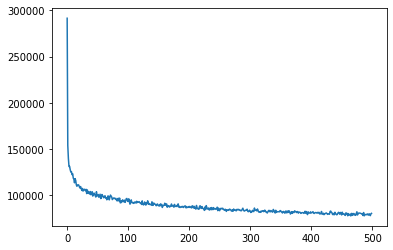

In [10]:
plt.plot(history.history['loss'])
valid_loss = model.evaluate(x_valid, y_valid,batch_size=10)
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
print(predict_x)
print(classes_x)